In [1]:
import gzip
from collections import Counter
import dictionary_functions as df
import pvml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

####### Read Files ##########
f=gzip.open("train.txt.gz", "rt")
klass=[]
publisher=[]
title=[]
for line in f:
    k, p, t = line.split("|")
    klass.append(k)
    publisher.append(p)
    title.append(t)

####### Encode Classes and Publishers #########
pub=sorted(list(Counter(publisher).keys())) #Get the list of unique publishers
kla=sorted(list(Counter(klass).keys())) #Get the list of unique classes

pub_enc=[]
klass_enc=[]
for p in publisher:
    pub_enc.append(pub.index(p)) #use the publisher index in pub to encode publishers
for k in klass:
    klass_enc.append(kla.index(k)) #use the class index in kla to encode classes

y_train=np.array(klass_enc)
t_pub_enc=pub_enc
t_title=title

######## Repeat for Validation and Test Sets #########
####### Read Files ##########
f=gzip.open("validation.txt.gz", "rt")
klass=[]
publisher=[]
title=[]
for line in f:
    k, p, t = line.split("|")
    klass.append(k)
    publisher.append(p)
    title.append(t)

####### Encode Classes and Publishers #########
pub=sorted(list(Counter(publisher).keys())) #Get the list of unique publishers
kla=sorted(list(Counter(klass).keys())) #Get the list of unique classes
pub_enc=[]
klass_enc=[]
for p in publisher:
    pub_enc.append(pub.index(p)) #use the publisher index in pub to encode publishers
for k in klass:
    klass_enc.append(kla.index(k)) #use the class index in kla to encode classes

y_val=np.array(klass_enc)
val_pub_enc=pub_enc
val_title=title

####### Read Files ##########
f=gzip.open("test.txt.gz", "rt")
klass=[]
publisher=[]
title=[]
for line in f:
    k, p, t = line.split("|")
    klass.append(k)
    publisher.append(p)
    title.append(t)

####### Encode Classes and Publishers #########
pub=sorted(list(Counter(publisher).keys())) #Get the list of unique publishers
kla=sorted(list(Counter(klass).keys())) #Get the list of unique classes

pub_enc=[]
klass_enc=[]
for p in publisher:
    pub_enc.append(pub.index(p)) #use the publisher index in pub to encode publishers
for k in klass:
    klass_enc.append(kla.index(k)) #use the class index in kla to encode classes

y_test=np.array(klass_enc)
test_pub_enc=pub_enc
test_title=title



######## Create Dictionary #########
size=10000
stem=False
ic=False
dic=df.build_dict(t_title, size, True, stemming=stem, ignore_common=ic)

######## Training Set ######
######## Create BoW ########
bow=df.build_bow(t_title, False, "train_bow", size, stemming=stem)
t_pub_enc=np.array(t_pub_enc)


######## Consolidate Features ########
x_train=np.zeros((len(t_pub_enc), size+1))
#bow=pvml.maxabs_normalization(bow)
for i in range(len(t_pub_enc)):
    x_train[i][:-1]=bow[i]
    x_train[i][-1]=t_pub_enc[i]

######## Validation Set ####
######## Create BoW ########
bow=df.build_bow(val_title, False, "val_bow", size, stemming=stem)
val_pub_enc=np.array(val_pub_enc)


######## Consolidate Features ########
x_val=np.zeros((len(val_pub_enc), size+1))
#bow=pvml.maxabs_normalization(bow)
for i in range(len(val_pub_enc)):
    x_val[i][:-1]=bow[i]
    x_val[i][-1]=val_pub_enc[i]

######## Test Set ##########
######## Create BoW ########
bow=df.build_bow(test_title, False, "test_bow", size, stemming=stem)
test_pub_enc=np.array(test_pub_enc)


######## Consolidate Features ########
x_test=np.zeros((len(test_pub_enc), size+1))
#bow=pvml.maxabs_normalization(bow)

for i in range(len(test_pub_enc)):
    x_test[i][:-1]=bow[i]
    x_test[i][-1]=test_pub_enc[i]

Training Accuracy:  94.85
Validation Accuracy:  89.2
Test Accuracy:  90.0


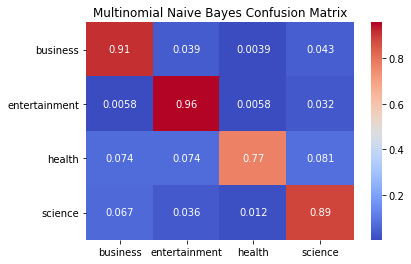

In [19]:
######## Bayes #########
data=np.load("bayes_"+str(size)+".npz", allow_pickle=True)
w=data["weights"]
b=data["biases"]
labels, scores = pvml.multinomial_naive_bayes_inference(x_train, w, b)
acc=(labels==y_train).mean()*100
print("Training Accuracy: ", acc)

labels, scores = pvml.multinomial_naive_bayes_inference(x_val, w, b)
acc=(labels==y_val).mean()*100
print("Validation Accuracy: ", acc)

labels, scores = pvml.multinomial_naive_bayes_inference(x_test, w, b)
acc=(labels==y_test).mean()*100
print("Test Accuracy: ", acc)

conf_mat=np.zeros((4,4))
for i in range(len(y_test)):
    conf_mat[int(y_test[i])][int(labels[i])]+=1
for i in range(4):
    conf_mat[i,:]/=conf_mat[i,:].sum()

sn.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.xticks(np.linspace(0.5, 3.5, 4),kla)
plt.yticks(np.linspace(0.5, 3.5, 4),kla, rotation="horizontal")
plt.show()

bayes_acc=[82.3, 88.3, 90.4, 90.3, 90.0] #no-norm
#2500
#88.3 no-norm
#85.7 maxabs
#87.9 ignore_common
#88.0 stemming
#88.9 ignore_common+stemming

Training Accuracy:  76.19
Validation Accuracy:  77.4
Test Accuracy:  75.6


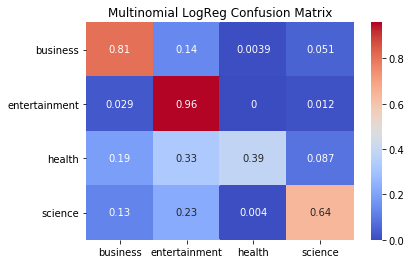

In [20]:
######## LogReg ############
data=np.load("logreg_"+str(size)+".npz", allow_pickle=True)
w=data["weights"]
b=data["biases"]
scores=pvml.multinomial_logreg_inference(x_train, w, b)
labels=np.argmax(scores, axis=1)
acc=np.array(labels==y_train).mean()*100
print("Training Accuracy: ", acc)

scores=pvml.multinomial_logreg_inference(x_val, w, b)
labels=np.argmax(scores, axis=1)
acc=np.array(labels==y_val).mean()*100
print("Validation Accuracy: ", acc)

scores=pvml.multinomial_logreg_inference(x_test, w, b)
labels=np.argmax(scores, axis=1)
acc=np.array(labels==y_test).mean()*100
print("Test Accuracy: ", acc)

conf_mat=np.zeros((4,4))
for i in range(len(y_test)):
    conf_mat[int(y_test[i])][int(labels[i])]+=1
for i in range(4):
    conf_mat[i,:]/=conf_mat[i,:].sum()

sn.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Multinomial LogReg Confusion Matrix")
plt.xticks(np.linspace(0.5, 3.5, 4),kla)
plt.yticks(np.linspace(0.5, 3.5, 4),kla, rotation="horizontal")
plt.show()
logreg_acc=[72.8, 75.1, 75.6, 75.5, 75.6]
#2500
#75.1 no-norm
#72.6 maxabs
#74.4 ignore_common
#76.8 stemming
#76.7 ignore_common+stemming

Final Training Accuracy:  97.11
Final Validation Accuracy:  90.8
Test Accuracy:  90.2


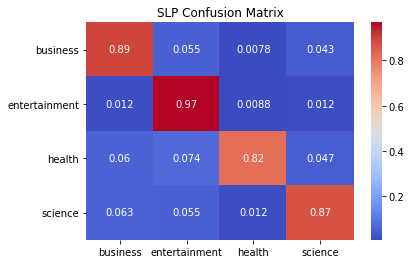

In [21]:
########## SLP ##########
snn=pvml.MLP.load("snn_"+str(size)+".npz")
train_labels=snn.inference(x_train)[0]
train_acc=(train_labels==y_train).mean()*100
print("Final Training Accuracy: ", train_acc)
val_labels=snn.inference(x_val)[0]
val_acc=(val_labels==y_val).mean()*100
print("Final Validation Accuracy: ", val_acc)
test_labels=snn.inference(x_test)[0]
test_acc=(test_labels==y_test).mean()*100
print("Test Accuracy: ", test_acc)

conf_mat=np.zeros((4,4))
for i in range(len(y_test)):
    conf_mat[int(y_test[i])][int(test_labels[i])]+=1
for i in range(4):
    conf_mat[i,:]/=conf_mat[i,:].sum()

sn.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("SLP Confusion Matrix")
plt.xticks(np.linspace(0.5, 3.5, 4),kla)
plt.yticks(np.linspace(0.5, 3.5, 4),kla, rotation="horizontal")
plt.show()

slp_acc=[83.2, 87.6, 89.6, 89.9, 90.2]
#2500
#87.6 no-norm
#87.9 maxabs
#88.2 ignore_common
#89.4 Stemming
#89.4 ignore_common+stemming

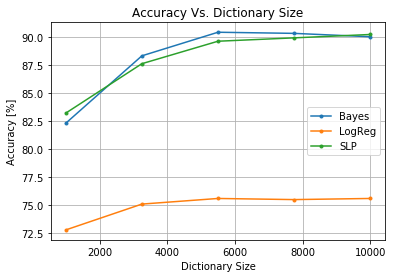

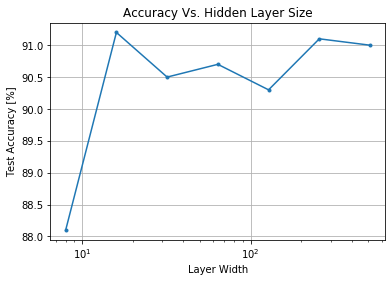

In [27]:
plt.plot(np.linspace(1000, 10000, 5), bayes_acc, label="Bayes", marker=".")
plt.plot(np.linspace(1000, 10000, 5), logreg_acc, label="LogReg", marker=".")
plt.plot(np.linspace(1000, 10000, 5), slp_acc, label="SLP", marker=".")
plt.title("Accuracy Vs. Dictionary Size")
plt.xlabel("Dictionary Size")
plt.ylabel("Accuracy [%]")
plt.grid()
plt.legend()
plt.show()

x=[8,16,32,64,128,256,512]
y=[88.1,91.2,90.5,90.7,90.3,91.1,91]
plt.plot(x,y, marker=".")
plt.semilogx()
plt.grid()
plt.title("Accuracy Vs. Hidden Layer Size")
plt.xlabel("Layer Width")
plt.ylabel("Test Accuracy [%]")
plt.show()

In [22]:
########## MLP ##########
dnn=pvml.MLP.load("dnn_"+str(size)+".npz")
train_labels=dnn.inference(x_train)[0]
train_acc=(train_labels==y_train).mean()*100
print("Final Training Accuracy: ", train_acc)
val_labels=dnn.inference(x_val)[0]
val_acc=(val_labels==y_val).mean()*100
print("Final Validation Accuracy: ", val_acc)
test_labels=dnn.inference(x_test)[0]
test_acc=(test_labels==y_test).mean()*100
print("Test Accuracy: ", test_acc)

conf_mat=np.zeros((4,4))
for i in range(len(y_test)):
    conf_mat[int(y_test[i])][int(test_labels[i])]+=1
for i in range(4):
    conf_mat[i,:]/=conf_mat[i,:].sum()

sn.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("SLP Confusion Matrix")
plt.xticks(np.linspace(0.5, 3.5, 4),kla)
plt.yticks(np.linspace(0.5, 3.5, 4),kla, rotation="horizontal")
plt.show()
#[size+1, 256, 64, 16, 4] (ic+stem)(2500) 89.7
#[size+1, 8, 8, 4] // // 84.89
#[size+1, 64, 8, 4] // // 89.6
#[size+1, 32, 8, 4] // // 87.2
#[size+1, 512, 64, 8, 4] // // 87.9
#[size+1, 256, 64, 8, 4] // // 87.1
#[size+1, 512, 4] // // 91.0
#[size+1, 256, 4] // // 91.1
#[size+1, 128, 4] // // 90.3
#[size+1, 64, 4] // // 90.7
#[size+1, 32, 4] // // 90.5
#[size+1, 16, 4] // // 91.2
#[size+1, 8, 4] // // 88.1

FileNotFoundError: [Errno 2] No such file or directory: 'dnn_10000.npz'